In [1]:
import os, sys

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

In [13]:
features = extract_audio_features(dataframe, SAMPLE_HIPHOP_FILE_PATH, '', '')
X = features.drop(['data_source', 'lpc_1', 'genre_label'], axis=1)

pipeline_estimator_path = MOUNTED_DATASET_PATH + '/model/pipeline_estimator_1.pkl'
model_path = MOUNTED_DATASET_PATH + '/model/cnn_model_1.h5'

pipeline_estimator = joblib.load(pipeline_estimator_path)
model = load_model(model_path)

X = pipeline_estimator.transform(X)
prediction = model.predict_proba(X)

map_prediction_to_genre = {}
for i in range(3):
    map_prediction_to_genre[GENRES[i]] = prediction[0][i].item()

map_prediction_to_genre

appended features extracted from /Users/macbookretina/Desktop/s3-bucket/gtzan/wavfiles/hiphop.00000.wav with genre: 
   mean_spec_centroid  median_spec_centroid  std_spec_centroid  \
0         2667.940502           2659.844701         646.933539   

   var_spec_centroid  mean_spec_rolloff  median_spec_rolloff  \
0       418523.00328        5475.312341          5587.866211   

   std_spec_rolloff  var_spec_rolloff  mean_zcr  median_zcr  ...  \
0       1250.663178      1.564158e+06  0.147309    0.142578  ...   

   sb_energy_db8_cD1  skewness_db8_cD1  5th_percentile_db8_cD1  \
0           0.023579         -0.007772               -0.057532   

   25th_percentile_db8_cD1  75th_percentile_db8_cD1  95th_percentile_db8_cD1  \
0                -0.012063                 0.011989                 0.057614   

   rms_db8_cD1  zcr_db8_cD1  mcr_db8_cD1  entropy_db8_cD1  
0     0.023579     236539.0     236539.0        12.707124  

[1 rows x 360 columns]
[[[0.64829886]
  [0.7659392 ]
  [0.84381095]
 

In [15]:
map_prediction_to_genre = {}
for i in range(3):
    map_prediction_to_genre[GENRES[i]] = prediction[0][i].item()

map_prediction_to_genre

{'hiphop': 0.8237514495849609,
 'rock': 0.14211833477020264,
 'pop': 0.03413014858961105}

In [1]:
data_trans = {'scaled': 6, 'norm': 8}
model = {'cnn': 6, 'fnn': 2}
af = {'selu': 16, 'relu': 8, 'elu': 4}
lr = {'0.0003': 6, '0.0001': 7, 'others': 3}
optimizer = {'adam': 13, 'rmsprop': 10, 'adagrad': 5}

In [29]:
import matplotlib.pyplot as pyplot
def plot_chart(data, x_label='', y_label='', chart_type='bar'):
    values = list(data.values())
    keys = list(data.keys())
    if chart_type == 'bar':
        pyplot.xticks(range(len(keys)), keys)
        pyplot.xlabel(x_label)
        pyplot.ylabel(y_label)
        pyplot.title('Bar Chart')
        pyplot.xticks(rotation=45)
        pyplot.bar(range(len(values)), values)
    elif chart_type == 'pie':
        pyplot.figure(figsize =(10, 7))
        pyplot.pie(values, labels=keys) 
    pyplot.show()

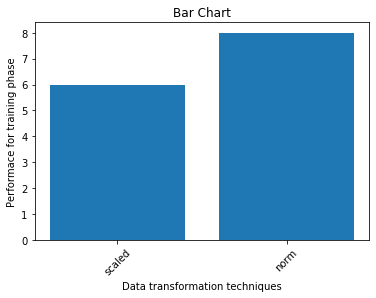

In [30]:
plot_chart(data_trans, x_label='Data transformation techniques', y_label='Performace for training phase')

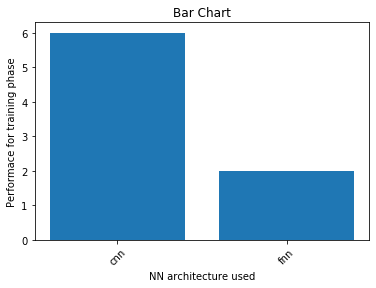

In [31]:
plot_chart(model, x_label='NN architecture used', y_label='Performace for training phase')

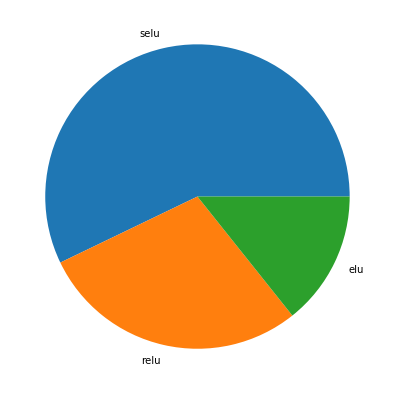

In [32]:
plot_chart(af, chart_type='pie')

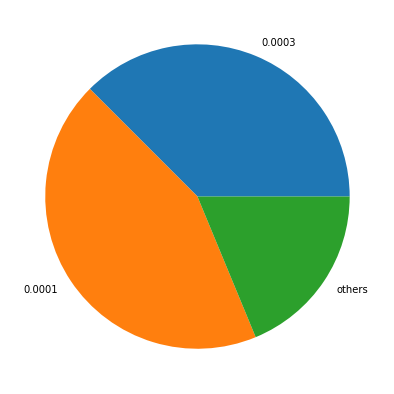

In [33]:
plot_chart(lr, chart_type='pie')

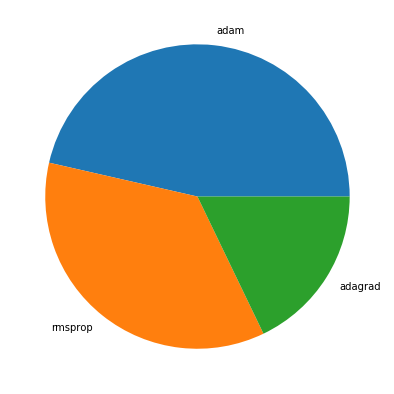

In [34]:
plot_chart(optimizer, chart_type='pie')

In [ ]:
# outliers = {
#     'all': [
#         '25th_percentile_db8_cA7','5th_percentile_db8_cA7','5th_percentile_db8_cD7',
#         '75th_percentile_db8_cA7','mcr_db4_cD1','mcr_db4_cD2','mcr_db8_cD2',
#         'mcr_db8_cD1','mcr_db5_cD2','mcr_db5_cD1','mean_spec_rolloff',
#         'median_spec_rolloff','var_beats','var_spec_centroid','var_spec_rolloff',
#         'zcr_db8_cD1'
#     ],
    
#     'tr': [
#         'mean_spec_rolloff','median_spec_rolloff','var_beats','var_spec_centroid',
#         'var_spec_rolloff'
#     ],
    
#     'pos_corr': [
#         '25th_percentile_db8_cA7','5th_percentile_db8_cA7','mcr_db4_cD2',
#         'mcr_db5_cD2','mcr_db8_cD2','var_beats'
#     ]
# }